# Red and White Wine Quality Analysis 

**Data Bootcamp - Fall 2018 MBA**

**Caroline Packowski, Gabrielle Sart and Kaitlin Slattery**


## Introduction 

For our course project, we set out to study how a wine's chemical composition (pH, alcohol, residual sugar, etc.) affects quality. 

By examining each of these chemical attributes, then taking those we suspect to have the greatest impact on quality and running correlation, regression and cluster tests, our goal is to confirm which attribute has the greatest impact on quality. 

We have broken our project into four sections. 
1. Dataset Background: basic analysis of our two data sets, White Wine and Red Wine, both separately and merged
2. White Wine Findings: distribution, scatterplots, correlation, regression and clusters.
3. Red Wine Findings: distribution, scatterplots, correlation, regression and clusters.
4. Key Takeaways

Finally, we will conclude with the implications of most important variables on wine buying and wine collecting.

## Packages

- We will use pandas to import, manage and analyze our data
- We will use matplotlib to plot and visualize results
- We will use datetime to check today's date
- We will use sys to convert to Python
- We will use numpy for specific functionality and computing
- We will use seaborn for more advanced visualization
- We will use statsmodels.api for statistical modeling and regressions
- We will use statsmodels.formula.api for statistical modeling and regressions

In [3]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 
import numpy as np                    # scientific computing   
import seaborn as sns                 # data visualization 
import statsmodels.api as sm          # statistical modeling
import statsmodels.formula.api as smf 


from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


## 1. Data Set Information 

The data sets we have pulled come essentially from Kaggle. We pulled one data set for White Wine and another for Red Wine.

Our dependent variable is **Quality**.

Our independent variables are as follows: 
- **Fixed Acidity**: acidity produced in the body from sources other than carbon dioxide
- **Volatile Acidity**: acidity that is typically a by-product of fermentation, but can also indicate spoilage
- **Citric Acid**: a weak organic acid often used as a natural preservative or additive to add a sour taste
- **Residual Sugar**: refers to any natural grape sugars that are leftover after fermentation ceases; fermentation uses up sugars as the yeasts consume it
- **Chlorides**: compounds responsible for salty taste
- **Free Sulfur Dioxide**: sulphur dioxide not associated with wine molecules
- **Total Sulfur Dioxide**: composed of free and bound sulphur dioxide, use as a preservative because of its anti-oxidative and anti-microbial properties
- **Density**: in the case of wine, it is primarily determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids
- **pH**: used as a measure of ripeness in relation to acidity
- **Sulphates**: a salt or ester of sulfuric acid, often used for industrial cleansing purposes
- **Alcohol**: also known by its chemical name ethanol, is a psychoactive substance that is the active ingredient in drinks such as beer, wine, and distilled spirits

While we will study each independent variable's particular effect on the depend variable, we understand that some effects may be interrelated by chemical processes.

In [4]:
url_white = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityWhites.csv" 
url_red = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityReds.csv"

dfwhite = pd.read_csv(url_white) # Read in dataset on white wine quality 
dfred = pd.read_csv(url_red) # Read in dataset on red wine quality 

dfwhite = dfwhite.rename(columns={'Unnamed: 0':'wine number', 'fixed.acidity':'fixed_acidity', 'volatile.acidity':'volatile_acidity',
                                 'citric.acid':'citric_acid','residual.sugar':'residual_sugar','total.sulfur.dioxide':'total_sulfur_dioxide',
                                 'free.sulfur.dioxide':'free_sulfur_dioxide'}) # Rename the columns 
dfred = dfred.rename(columns={'Unnamed: 0':'wine number','fixed.acidity':'fixed_acidity', 'volatile.acidity':'volatile_acidity',
                                 'citric.acid':'citric_acid', 'residual.sugar':'residual_sugar', 'total.sulfur.dioxide':'total_sulfur_dioxide',
                                 'free.sulfur.dioxide':'free_sulfur_dioxide'}) # Rename the columns 

dfwhite['type']='White' # Added a column to dfwhite for 'type' = 'White'
dfred['type']='Red' # Added a column to dfred for 'type' = 'Red'

dfwhite = dfwhite.set_index(['wine number', 'type']) # Set two indexes 
dfred = dfred.set_index(['wine number', 'type']) # Set two indexes 

Let's look at characteristics of each data frame:

In [5]:
for df in [dfwhite, dfred]:
    print('Type:', type(df), '\n')
    print('Dimensions:', df.shape, '\n')
    print('Variables:', df.columns.tolist(), '\n \n')

Type: <class 'pandas.core.frame.DataFrame'> 

Dimensions: (4898, 12) 

Variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
 

Type: <class 'pandas.core.frame.DataFrame'> 

Dimensions: (1599, 12) 

Variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
 



The White Wine data frame has 4898 observations against 12 variables, which are Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol, and Quality.

The Red Wine data frame has 1599 observations against 12 variables, which are Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol, and Quality.

Next let's merge the two data frames, each with another column for Type - Red or White.

In [17]:
frames = [dfwhite, dfred]
df = pd.concat(frames) # Create a new dataframe merging dfwhite and dfred 

df

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
2,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
3,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
8,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
9,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6


The new merge data frame has 6497 rows, or observations, against 12 columns, or variables.

df.describe provides us with high-level, descriptive statistics on the merged data frame, including mean, standard deviation, minimum and maximum values.

In [18]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


df.info tells us what type of object each variable is: all independent variables are floats, and the dependent variable Quality is an integer.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6497 entries, (1, White) to (1599, Red)
Data columns (total 12 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 666.5+ KB


Next, we wanted to look at the distribution of quality in the merged data set. Most wines were given a 6, followed relatively closely by 5. The score of 7 was less frequent, and the most extreme scores on either end (3, 4, 8, 9) were rare.

In [22]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

The below bar chart shows the breakdown of quality scores visually, with the full bar representing total counts. The red and white portion of the bars help us differentiate which counts came from the Red Wine vs. the White Wine data sets.

Next, we want to attempt to show it all of wine quality - but white wines have a white bar, and red wine have a red bar?  


In [27]:
df_plot = df.groupby(['type', 'quality']).size().reset_index().pivot(columns='type', index='quality', values=0)
df_plot

type,Red,White
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


Text(0.5,1,'Wine Quality Count')

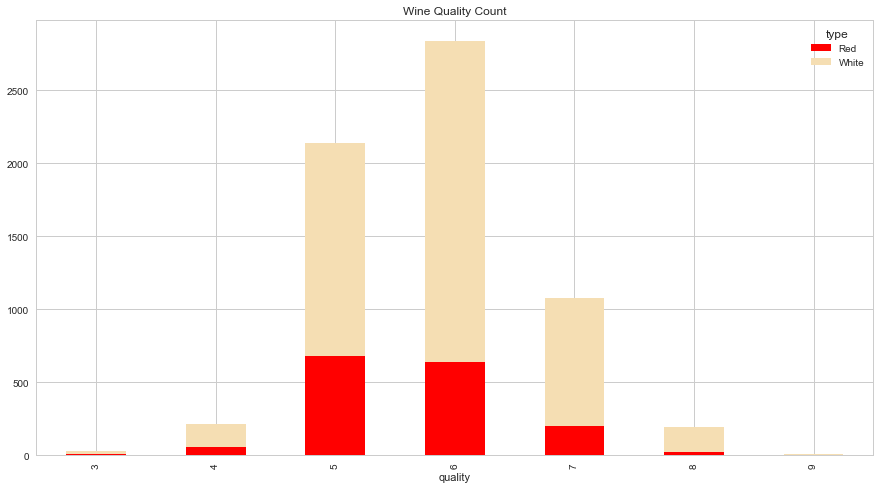

In [28]:
df_plot.plot(kind='bar', stacked=True, figsize=(15,8), color =['red','wheat']).set_title('Wine Quality Count')

# 2. White Wine Findings

Let's look at the White Wine data set.

In [7]:
dfwhite

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
2,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
3,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
6,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
8,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
9,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6


### *Groupby*

We grouped observations by quality score and by independent variable, and then found the average for each variable.

In [8]:
dfwhite.groupby('quality')['fixed_acidity','volatile_acidity', 'citric_acid', 
            'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
            'density', 'pH', 'sulphates', 'alcohol'].mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Quality scores range from 3 to 9.

While the above does not yet show very clear patterns in terms of what variable has the strongest impact on quality, it does appear that lower volatile acidity is associated with higher quality wines, as are low levels of chlorides and total sulfure dioxide, lower density and higher pH. We will run more test to confirm this initial read.

### *Distribution of Quality in White Wines*

In [21]:
dfwhite['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

The below bar chart shows the quality score breakdown in White Wines. Most wines were awarded a score of 6, followed by the score of 5 and 7. There were only a few 4 and 8 scores given, and virtually no 3 or 9 scores.

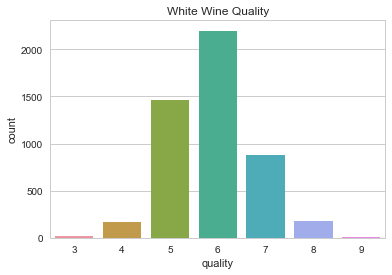

In [24]:
sns.set(style='whitegrid')

sns.countplot(x = 'quality',
              data = dfwhite).set_title('White Wine Quality')
plt.show()

### *Scatterplots*

#### Quality vs Fixed Acidity 

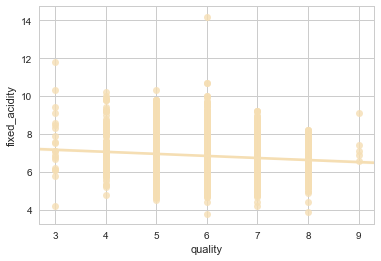

In [32]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["fixed_acidity"], color = 'wheat')

#### Quality vs Volatile Acidity 

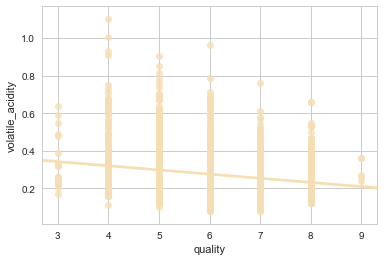

In [34]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["volatile_acidity"], color = 'wheat')

#### Quality vs Citric Acid

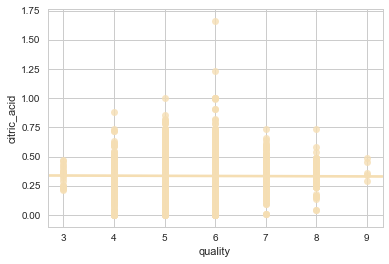

In [36]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["citric_acid"], color = 'wheat')

#### Quality vs Residual Sugar

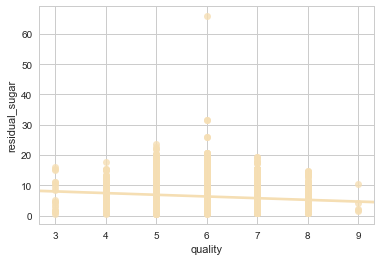

In [47]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["residual_sugar"], color='wheat')

#### Quality vs Chlorides

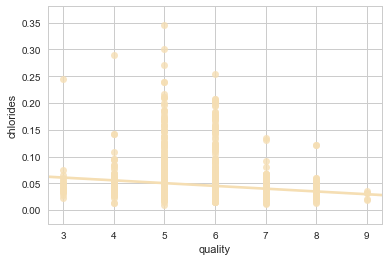

In [48]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["chlorides"], color='wheat')

#### Quality vs Free Sulfur Dioxide

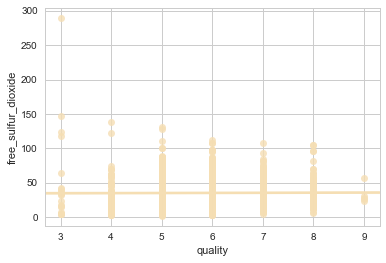

In [49]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["free_sulfur_dioxide"], color='wheat')

#### Quality vs Total Sulfur Dioxide

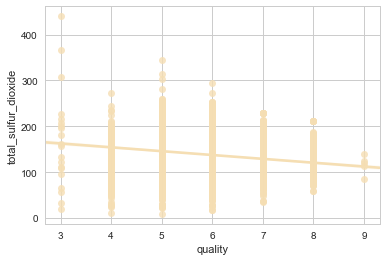

In [50]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["total_sulfur_dioxide"], color='wheat')

#### Quality vs Density

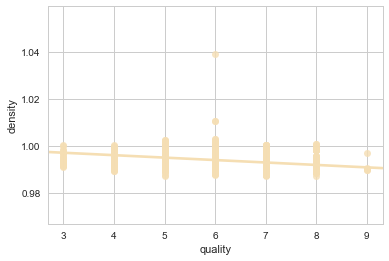

In [52]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["density"], color = 'wheat')

#### Quality vs pH

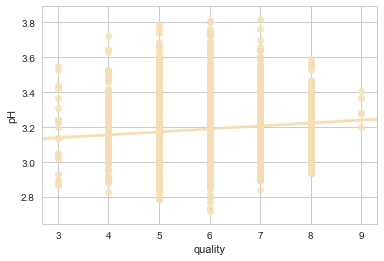

In [54]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["pH"], color = 'wheat')

#### Quality vs Sulphates


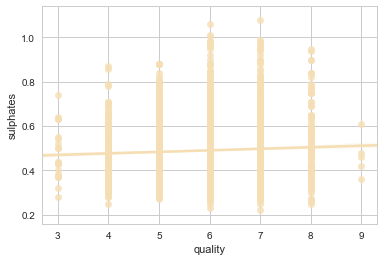

In [56]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["sulphates"], color = 'wheat')

#### Quality vs Alcohol

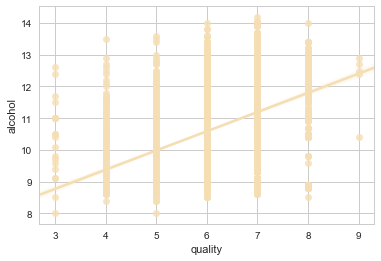

In [58]:
sns.regplot(x=dfwhite["quality"], y=dfwhite["alcohol"], color = 'wheat')

**Given the above scatterplots, Density appears to have the strongest relationship with White Wine Quality, followed by Residual Sugar and Free Sulphur Dioxide.**

### *Correlation*

Correlation is an interdependence between two variables, and the correlation coefficient is a statistical measure that calculates the strength of this interdependence. The range of values for the correlation coefficient are from -1.0 to 1.0, these values indicating the strongest correlation.

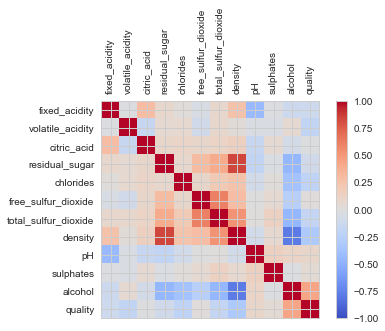

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [66]:
corr_white = dfwhite.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_white,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfwhite.columns)
ax.set_yticklabels(dfwhite.columns)
plt.show()

corr_white

**Based on the above, Alcohol seems to have the biggest correlation with Quality (0.436) in White Wines, followed by Density (-0.307) and Chlorides (-0.210).**

### *Regression*

**GHS REWRITE** Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.  The key to understanding the coefficients is to think of them as slopes, and they’re often called slope coefficients (this is copy and pasted, don't use) 

**KRS INSERT**

### *Clusters*

**GHS INTRO**

**KRS INSERT**

# 3. Red Wine Findings

Let's look at the Red Wine data set.

In [9]:
dfred

,,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
wine number,type,,,,,,,,,,,,
1,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,Red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,Red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,Red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
6,Red,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
7,Red,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
8,Red,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
9,Red,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7


### *Groupby*

We grouped observations by quality score and by independent variable, and then found the average for each variable.

In [11]:
dfred.groupby('quality')['fixed_acidity','volatile_acidity', 'citric_acid', 
            'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
            'density', 'pH', 'sulphates', 'alcohol'].mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Quality scores range from 3 to 8.

For Red Wine, it appears that lower volatile acidity also relates to high quality scores, as do higher levels of citric acid and sulphates, and lower levels of chlorides and pH.

The below bar chart shows the quality score breakdown in Red Wines. It's a pretty close call between the scores of 5 and 6 but slightly more were given a 5, trailed by the score of 7. There were very few 3, 4 and 8 scores.

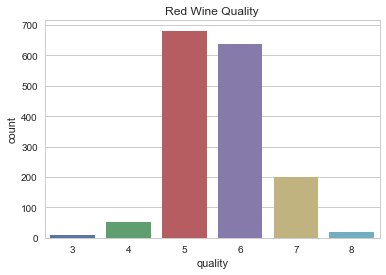

In [25]:
sns.set(style='whitegrid')

sns.countplot(x = 'quality',
              data = dfred).set_title('Red Wine Quality')
plt.show()

### *Distribution of Quality in Red Wines*

In [23]:
dfred['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### *Scatterplots*

#### Quality vs Fixed Acidity 

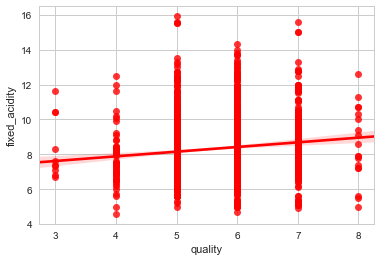

In [31]:
sns.regplot(x=dfred["quality"], y=dfred["fixed_acidity"], color='red')

#### Quality vs Volatile Acidity 

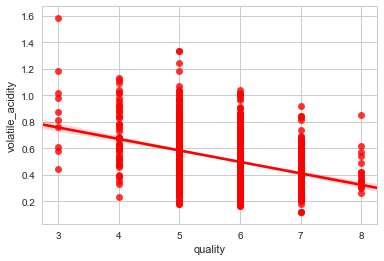

In [33]:
sns.regplot(x=dfred["quality"], y=dfred["volatile_acidity"], color='red')

#### Quality vs Citric Acid

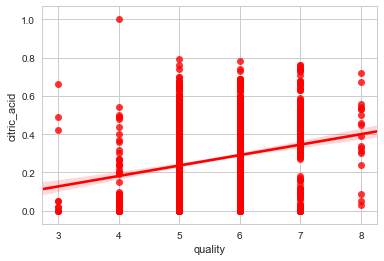

In [35]:
sns.regplot(x=dfred["quality"], y=dfred["citric_acid"], color='red')

#### Quality vs Residual Sugar

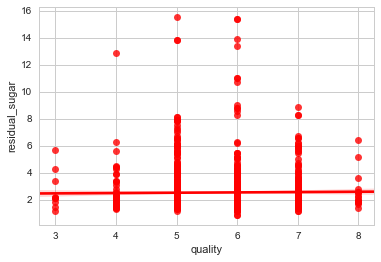

In [37]:
sns.regplot(x=dfred["quality"], y=dfred["residual_sugar"], color='red')

#### Quality vs Chlorides

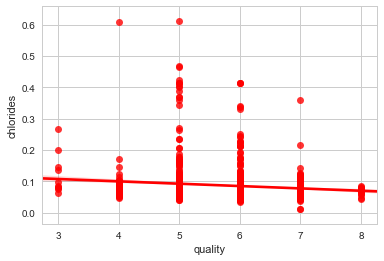

In [39]:
sns.regplot(x=dfred["quality"], y=dfred["chlorides"], color='red')

#### Quality vs Free Sulfur Dioxide

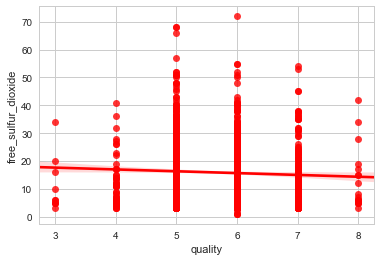

In [41]:
sns.regplot(x=dfred["quality"], y=dfred["free_sulfur_dioxide"], color='red')

#### Quality vs Total Sulfur Dioxide


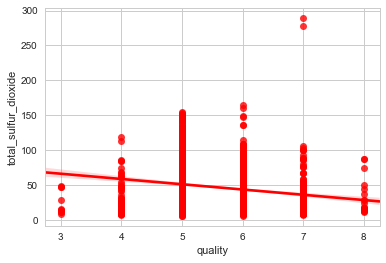

In [44]:
sns.regplot(x=dfred["quality"], y=dfred["total_sulfur_dioxide"], color='red')

#### Quality vs Density

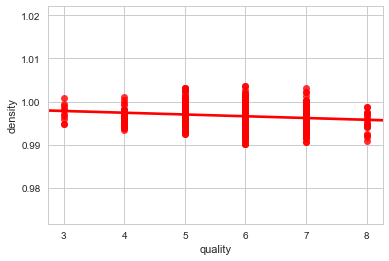

In [51]:
sns.regplot(x=dfred["quality"], y=dfred["density"], color='red')

#### Quality vs pH

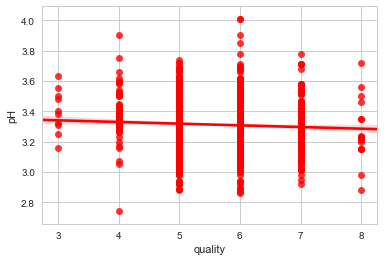

In [53]:
sns.regplot(x=dfred["quality"], y=dfred["pH"], color='red')

#### Quality vs Sulphates

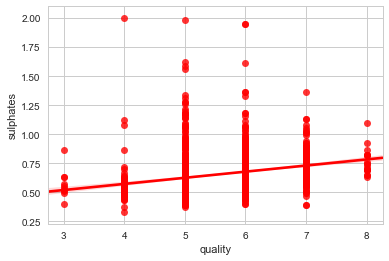

In [55]:
sns.regplot(x=dfred["quality"], y=dfred["sulphates"], color='red')

#### Quality vs Alcohol

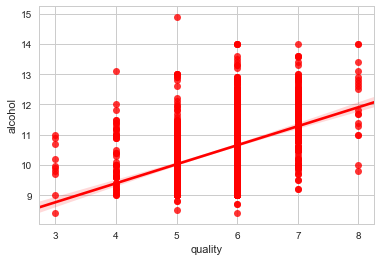

In [57]:
sns.regplot(x=dfred["quality"], y=dfred["alcohol"], color='red')

**Based on the above plots, Density appears to have the strongest relationship with Red Wine Quality, followed by Volatile Acidity and Chlorides.**

### *Correlation*

Correlation is an interdependence between two variables, and the correlation coefficient is a statistical measure that calculates the strength of this interdependence. The range of values for the correlation coefficient are from -1.0 to 1.0, these values indicating the strongest correlation.

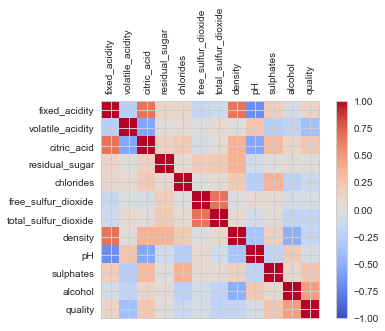

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [67]:
corr_red = dfred.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_red,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfred.columns)
ax.set_yticklabels(dfred.columns)
plt.show()

corr_red

**Based on the above, Alcohol seems to have the biggest correlation with Quality in Red Wine as well (0.476) followed by Volatile Acidity (-0.39).**

### *Regression*

**GHS REWRITE** Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.  The key to understanding the coefficients is to think of them as slopes, and they’re often called slope coefficients (this is copy and pasted, don't use) 

**KRS INSERT**

### *Clusters*

**GHS INTRO**

**KRS INSERT**

# 4. Key Takeaways TO CONFIRM

Top Quality Predictors:
- White: Density, Alcohol, Chlorides, Residual Sugar, Free Sulphur Dioxides
- Red: Density, Alcohol, Volatile Acidity, Chlorides

Ultimately, we did not see as strong a correlation between the variables and Quality as initially expected. While there are certain chemical attributes whose patterns can help predict whether a wine will be of high quality, there does not seem a be a single recipe for what makes wine good. Furthermore, the quality-predicting attributes vary between Red and White Wine.

# Conclusion

This was our first exploration of the relationship between a wine's chemical attributes and its quality, but can agree this exercise has real-world impact. It can be used as a guide for recommending and purchasing wine. It could also be used in wine valuation for younger, lesser known wines that don't yet have the benefit of age or reputation.

We also wondered whether there is a relationship or correlation between Quality and Retail Value. Unfortunately, since we could not find any data sets that mapped this variable, we were not able to test it our ourselves.

# KEEP BELOW? COEFFICIENTS SEEM WRONG

In [24]:
from sklearn.linear_model import LinearRegression 

# White Wine regression coefficient  

X = dfwhite.drop('quality', axis = 1) # creating variable X, with quality dropped since thats the dependent variable
lm = LinearRegression()
lm.fit(X,dfwhite.quality)
White_Regression = pd.DataFrame(list(zip(X.columns, lm.coef_)), 
             columns = ['features', 'estimatedCoefficients']) # naming new dataframe 
White_Regression

,features,estimatedCoefficients
0,fixed_acidity,0.065520
1,volatile_acidity,-1.863177
2,citric_acid,0.022090
3,residual_sugar,0.081483
4,chlorides,-0.247277
5,free_sulfur_dioxide,0.003733
6,total_sulfur_dioxide,-0.000286
7,density,-150.284181
8,pH,0.686344
9,sulphates,0.631476


In [25]:
# Red Wine regression coefficient  

X = dfred.drop('quality', axis = 1) # creating variable X, with quality dropped since thats the dependent variable
lm = LinearRegression()
lm.fit(X,dfred.quality)
Red_Regression = pd.DataFrame(list(zip(X.columns, lm.coef_)), 
             columns = ['features', 'estimatedCoefficients']) # naming the new dataframe 
Red_Regression

,features,estimatedCoefficients
0,fixed_acidity,0.024991
1,volatile_acidity,-1.083590
2,citric_acid,-0.182564
3,residual_sugar,0.016331
4,chlorides,-1.874225
5,free_sulfur_dioxide,0.004361
6,total_sulfur_dioxide,-0.003265
7,density,-17.881164
8,pH,-0.413653
9,sulphates,0.916334


# CLUSTER WIP BELOW

## Use clustering to group wines together to offer recomendations? 

* Complete for red and white wine seperate 
* X and Y will be the two most important variables for red and white wine (may be different) 
* Create clusters which will be our recomendation 
* Can theoretically talk about how this is how we would do a recomendation tool 
* Can look and see do clusters have similar quality ratings? 


White Wine - density and alcohol 

Red Wine - volatile acidity and alcohol 

**White Wine**

In [26]:
#Scaling of data
ss_white = StandardScaler()
ss_white.fit_transform(dfwhite)

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

(1) k-means clustering

In general, k-means is the first choice for clustering because of its simplicity. Here, the user has to define the number of clusters (Post on how to decide the number of clusters would be dealt later). The clusters are formed based on the closeness to the center value of the clusters. The initial center value is chosen randomly. K-means clustering is top-down approach, in the sense, we decide the number of clusters (k) and then group the data points into k clusters. - **stole from website need to sumarize** 

In [27]:
#K means Clustering 
#def doKmeans(X, nclust=3):
 #   model = KMeans(nclust)
   # model.fit(X)
   # clust_labels = model.predict(X)
    #cent = model.cluster_centers_
    #return (clust_labels, cent)

#clust_labels, cent = doKmeans(dfwhite, 20)
#kmeans = pd.DataFrame(clust_labels)
#dfwhite.insert((dfwhite.shape[1]),'kmeans',kmeans)

In [28]:
#Plot the clusters obtained using k means
#fig = plt.figure()
#ax = fig.add_subplot(111)
#scatter = ax.scatter(dfwhite['density'],dfwhite['chlorides'],
                     #c=kmeans[0],s=4)
#ax.set_title('K-Means Clustering')
#ax.set_xlabel('Density')
#ax.set_ylabel('Chlorides')
#plt.colorbar(scatter)

In [29]:
#X = np.array(dfwhite.drop(['quality'], 1).astype(float))
#y = np.array(dfwhite['quality'])

In [30]:
# Scaling features that we are feeding into the model 

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

# Building the k-means model 

#kmeans = KMeans(n_clusters=10) 
#kmeans.fit(X_scaled)

In [31]:
#kmeans = KMeans(n_clusters=10) 
#kmeans.fit(X)

In [32]:
#KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
#    n_clusters=10, n_init=100, n_jobs=1, precompute_distances='auto',
#    random_state=None, tol=0.0001, verbose=0)

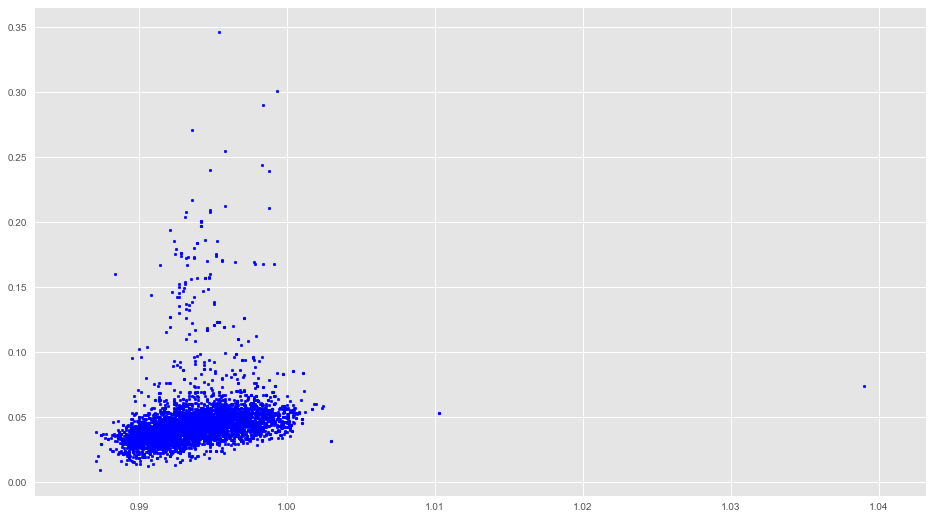

In [36]:
# Getting the values and plotting it
f1 = dfwhite['density'].values
f2 = dfwhite['chlorides'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='blue', s=7)

In [37]:
f1

array([1.001  , 0.994  , 0.9951 , ..., 0.99254, 0.98869, 0.98941])